In [27]:
import os,sys, re, glob
import numpy as np
import pandas as pd
import planetmodels as PM
import matplotlib.pyplot as plt
import mosaic_tools as mt

PT = mt.PlottingTools()
join = os.path.join
%matplotlib nbagg

In [8]:
pm = PM.PlanetModels()

In [ ]:
basepath = '/Users/rpatel/Dropbox/Research/S2M'

In [16]:
path_to_keck_data_dir = '/Users/rpatel/Dropbox/Research/ObservingData/KeckNIRC2/AUMic'


data2use_dirLp = 'combinedout_2night_ultimate'

path_main   = join(path_to_keck_data_dir,data2use_dirLp)


model_folder = '/Users/rpatel/Dropbox (Personal)/Research/Interpolation_Files/PlanetModels/'
modCube_location = join(model_folder,'PlanetModels.pickle')

if not os.path.isfile(modCube_location):
    pm.cullModels(model_folder)

pm.loadPickelModels(modCube_location)
modelNames = pm.modelNames

## Load and plot all contrast curves

In [37]:
curve_files

['/Users/rpatel/Dropbox/Research/ObservingData/KeckNIRC2/AUMic/combinedout_2night_ultimate/contrast_curves_2/AUMic_5sigmaLimit_adi_pc0_inrad3_587.csv',
 '/Users/rpatel/Dropbox/Research/ObservingData/KeckNIRC2/AUMic/combinedout_2night_ultimate/contrast_curves_2/AUMic_5sigmaLimit_adi_pc10_inrad3_587.csv',
 '/Users/rpatel/Dropbox/Research/ObservingData/KeckNIRC2/AUMic/combinedout_2night_ultimate/contrast_curves_2/AUMic_5sigmaLimit_adi_pc11_inrad3_587.csv',
 '/Users/rpatel/Dropbox/Research/ObservingData/KeckNIRC2/AUMic/combinedout_2night_ultimate/contrast_curves_2/AUMic_5sigmaLimit_adi_pc12_inrad3_587.csv',
 '/Users/rpatel/Dropbox/Research/ObservingData/KeckNIRC2/AUMic/combinedout_2night_ultimate/contrast_curves_2/AUMic_5sigmaLimit_adi_pc1_inrad3_587.csv',
 '/Users/rpatel/Dropbox/Research/ObservingData/KeckNIRC2/AUMic/combinedout_2night_ultimate/contrast_curves_2/AUMic_5sigmaLimit_adi_pc2_inrad3_587.csv',
 '/Users/rpatel/Dropbox/Research/ObservingData/KeckNIRC2/AUMic/combinedout_2night_ult

<IPython.core.display.Javascript object>


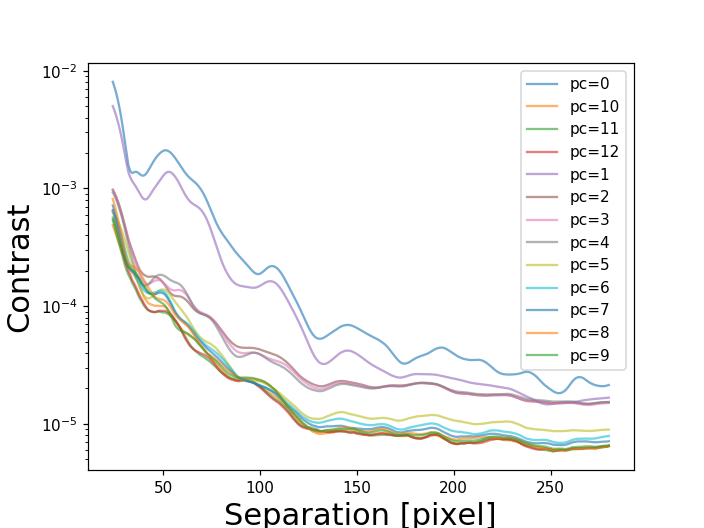

In [23]:
curve_files = glob.glob(join(path_main,'contrast_curves_2','*'))
sep_col = 'distance'
sens_col = 'sensitivity (Gauss)'

plt.figure()

for cfile in curve_files:
    
    ccdata = pd.read_csv(cfile)
    
    cfile = os.path.basename(cfile)
    pc = int(re.sub('_inrad3_587.csv','',re.sub('AUMic_5sigmaLimit_adi_pc','',cfile)))
    
    
    radpixel = ccdata[sep_col].values
    contrast = ccdata[sens_col].values

    plt.plot(radpixel,contrast,'-',alpha=0.6,label='pc={}'.format(pc),ms=1)
    plt.ylabel(r'Contrast',fontsize=20)
    plt.xlabel('Separation [pixel]',fontsize=20)

#plt.ylim(0,10)
#plt.xlim(0,150)
plt.semilogy()
plt.legend()


## LOAD CURVE FROM ONE PC

In [33]:
from astropy import units as u

ageAUMic = 23 * u.Myr
distAUMic = 9.79 # pc
e_distAUMic = .036975
pxscale = 0.009952
AUMic_Lpmag = 4.5

KLMode = 12
curves = glob.glob(join(path_main,'contrast_curves_2','*_pc{}*'.format(KLMode)))[0]
ccdata = pd.read_csv(curves)

radpixel = ccdata['distance'].values
contrast = ccdata['sensitivity (Gauss)'].values
noise = ccdata['noise'].values

## PLOT CONTRAST CURVE

<IPython.core.display.Javascript object>


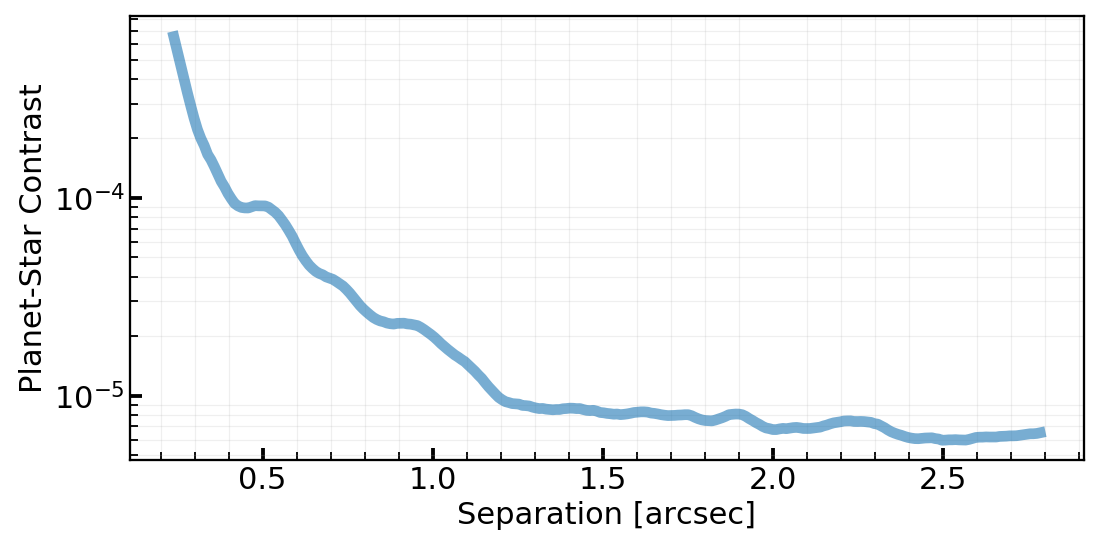

/Users/rpatel/Documents/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [30]:
# ==========================================================================
#                     CONTRAST CURVE
# ==========================================================================
ax2 = plt.figure(figsize=(10,5)).add_subplot(111)
PT.plot_setup(ax2,minortickson=True)
ax2.plot(radpixel*pxscale,contrast,'-',lw=7,alpha=0.6,ms=5,mec='none')

ax2.set_ylabel(r'Planet-Star Contrast',fontsize=20)
ax2.set_xlabel('Separation [arcsec]',fontsize=20)
ax2.grid(which='minor',alpha=0.2)
plt.semilogy()
plt.tight_layout()
# ==========================================================================

In [31]:
modelNames2Use = [ 'model.AMES-Cond-2000.M-0.0.NaCo.Vega', 
                  'model.BT-Settl.M-0.0.NIRI.Vega']
# modelNames2Use =  ['model.SpBu_atm1_S012.0',
#                    'model.SpBu_atm2_S012.0',
#                    'model.SpBu_atm3_S012.0',
#                    'model.SpBu_atm4_S012.0',
#                   ]
#modelNames2Use =  ['model.SpBu_atm4_S09.0']


modelNames2Use = filter(lambda x: 'SpBu_atm' not in x, modelNames)

## MASS CURVES

<IPython.core.display.Javascript object>


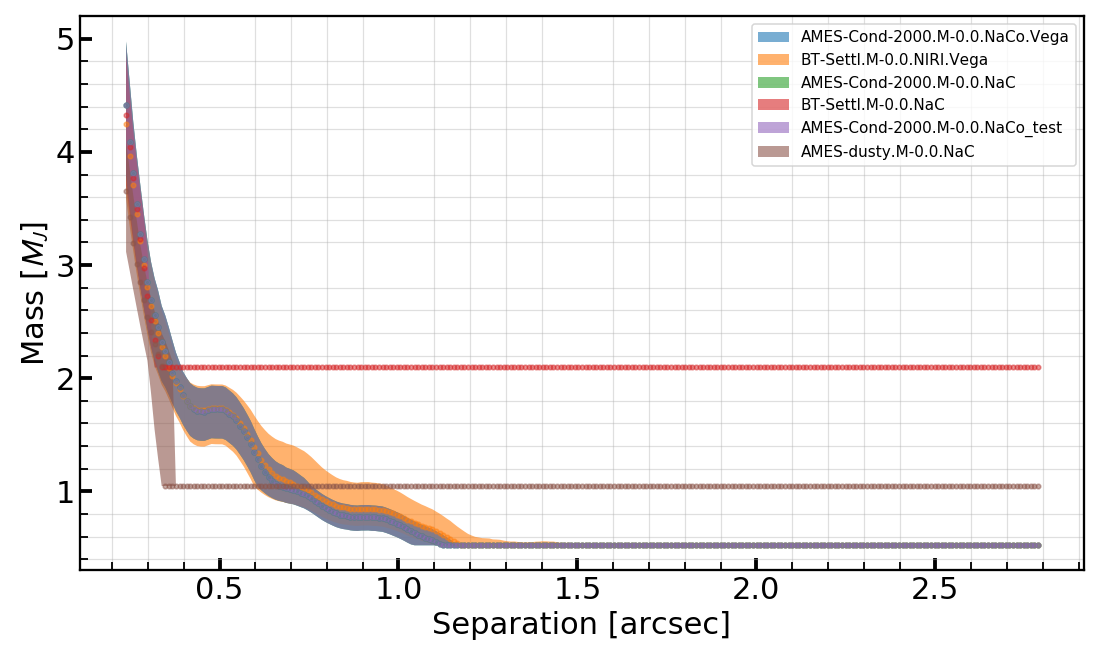

In [34]:
massCol, Lcol = 'M/Ms', "L'"

fig,ax1 = plt.subplots(figsize=(10,6))
PT.plot_setup(ax1,minortickson=True)

ax1.set_ylabel(r'Mass [$M_J$]',fontsize=20)
ax1.set_xlabel('Separation [arcsec]',fontsize=20)


for useModel in modelNames2Use:
    
    #useModel = modelNames[16]

    intpobj = pm.ageIntp(ageAUMic,useModel, massCol, Lcol)
    intpobj_up = pm.ageIntp(ageAUMic+5*u.Myr,useModel,massCol, Lcol)
    intpobj_down = pm.ageIntp(ageAUMic-5*u.Myr,useModel,massCol, Lcol)

    LMass_AUMICintp = intpobj
    LMass_AUMICintp_up = intpobj_up
    LMass_AUMICintp_down = intpobj_down

    masses = pm.getMasses(LMass_AUMICintp,contrast,AUMic_Lpmag,distAUMic)
    masses_up = pm.getMasses(LMass_AUMICintp_up, contrast,AUMic_Lpmag,distAUMic)
    masses_down = pm.getMasses(LMass_AUMICintp_down, contrast,AUMic_Lpmag,distAUMic)

    masses = masses.to('Mjup').value
    masses_up = masses_up.to('Mjup').value
    masses_down = masses_down.to('Mjup').value


    # PLOT
    xarcsec = radpixel * pxscale

    ax1.plot(xarcsec,masses,'o',ms=3,alpha=0.5,zorder=10)
    ax1.fill_between(xarcsec, masses_up,masses_down,label=useModel.strip('model.'),zorder=9,alpha=0.6)

    # ax2.plot(xarcsec,M_planet,'k.')
    # ax2.clear()
    #ax2.set_ylim(contrast.min(), contrast.max())
#    ax2.set_ylabel('M_planet',fontsize=20)
    #ax2.get_yaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))

ax1.grid(which='minor',zorder=1,alpha=0.4)
plt.tight_layout()
ax1.legend(loc=0)

<IPython.core.display.Javascript object>


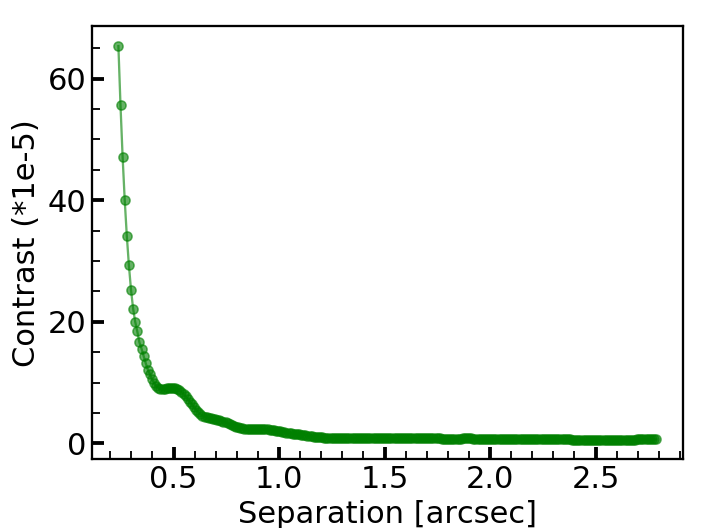

In [35]:
ax3 = plt.figure().add_subplot(111)
PT.plot_setup(ax3)
ax3.plot(xarcsec,contrast/1e-5,'go-',alpha=0.6)

ax3.set_ylabel(r'Contrast (*1e-5)',fontsize=20)
ax3.set_xlabel('Separation [arcsec]',fontsize=20)


<IPython.core.display.Javascript object>


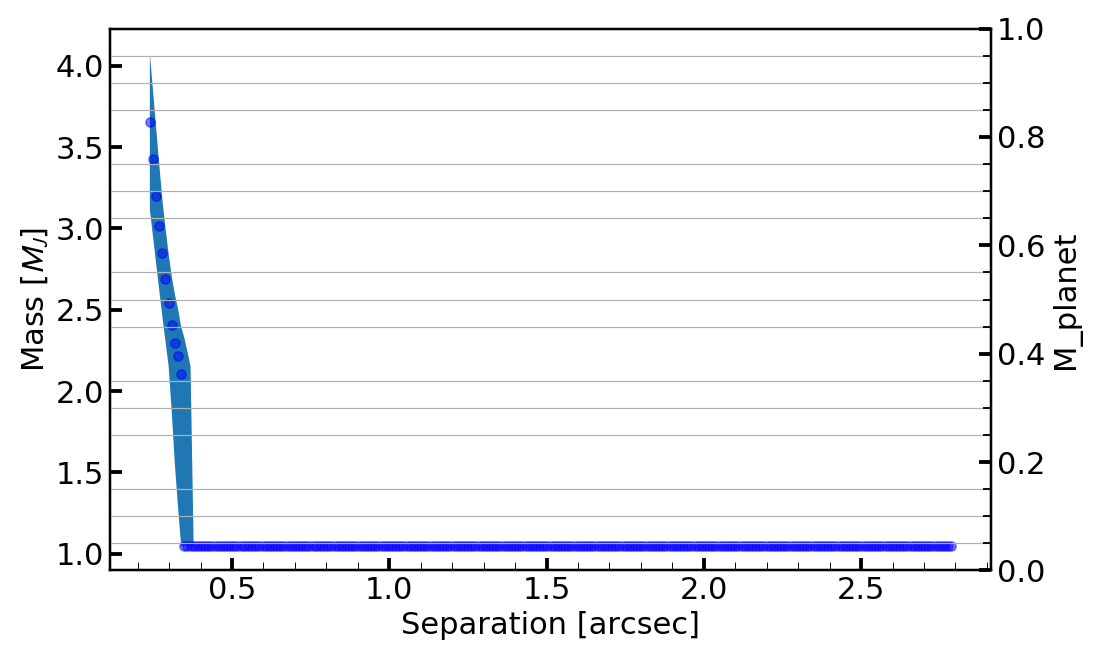

In [36]:


xarcsec = radpixel * pxscale

fig,ax1 = plt.subplots(figsize=(10,6))

ax1.plot(xarcsec,masses,'bo',alpha=0.5)
ax1.fill_between(xarcsec, masses_up,masses_down)


ax2 = ax1.twinx()
PT.plot_setup(ax1,minortickson=False)
PT.plot_setup(ax2)

ax1.set_ylabel(r'Mass [$M_J$]',fontsize=20)
ax1.set_xlabel('Separation [arcsec]',fontsize=20)

# ax2.plot(xarcsec,M_planet,'k.')
# ax2.clear()
#ax2.set_ylim(contrast.min(), contrast.max())
ax2.set_ylabel('M_planet',fontsize=20)
#ax2.get_yaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))



plt.grid(which='minor')
plt.tight_layout()
